In [1]:
# GPU setting
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="3"

import numpy as np
import matplotlib.pyplot as plt
import syHHT

In [2]:
BDC_dir = os.listdir('/mnt/disk1/sooyoung/AnoRNN/data/BDC_savednpy/')
BDC_dir

['dball_14.npy',
 'dball_21.npy',
 'dball_28.npy',
 'dball_7.npy',
 'dinner_14.npy',
 'dinner_21.npy',
 'dinner_28.npy',
 'dinner_7.npy',
 'douter_14.npy',
 'douter_21.npy',
 'douter_7.npy',
 'fball_14.npy',
 'fball_21.npy',
 'fball_7.npy',
 'finner_14.npy',
 'finner_21.npy',
 'finner_7.npy',
 'fouter_14.npy',
 'fouter_21.npy',
 'fouter_7.npy',
 'normal.npy']

In [3]:
d_ball, d_inner, d_outer = [], [], []
f_ball, f_inner, f_outer = [], [], []
normal = []

for npy in BDC_dir:
    if 'dball' in npy: d_ball.append(npy)
    elif 'dinner' in npy: d_inner.append(npy)
    elif 'douter' in npy: d_outer.append(npy)
    elif 'fball' in npy: f_ball.append(npy)
    elif 'finner' in npy: f_inner.append(npy)
    elif 'fouter' in npy: f_outer.append(npy)
    elif 'normal' in npy: normal.append(npy)
        
print(d_ball, d_inner, d_outer, f_ball, f_inner, f_outer, normal, sep = '\n')

['dball_14.npy', 'dball_21.npy', 'dball_28.npy', 'dball_7.npy']
['dinner_14.npy', 'dinner_21.npy', 'dinner_28.npy', 'dinner_7.npy']
['douter_14.npy', 'douter_21.npy', 'douter_7.npy']
['fball_14.npy', 'fball_21.npy', 'fball_7.npy']
['finner_14.npy', 'finner_21.npy', 'finner_7.npy']
['fouter_14.npy', 'fouter_21.npy', 'fouter_7.npy']
['normal.npy']


In [ ]:
sample_freq = 12000
interval = 3000

HHT = syHHT.HHT(sample_freq, interval)

# normal

In [4]:
normal = np.load('/mnt/disk1/sooyoung/AnoRNN/data/BDC_savednpy/normal.npy')

print("normal shape:", normal.shape)
print("normal 1st:", normal[0].shape)
print("normal 2nd:", normal[1].shape)
print("normal 3rd:", normal[2].shape)
print("normal 4th:", normal[3].shape)

normal shape: (4,)
normal 1st: (485643,)
normal 2nd: (243938,)
normal 3rd: (483903,)
normal 4th: (483903,)


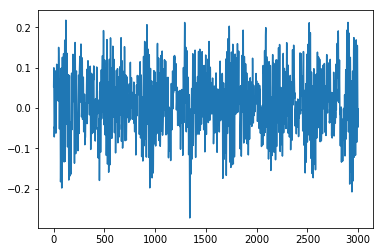

In [5]:
normal_ex = normal[1][:interval]
plt.plot(normal_ex)
plt.show()

In [6]:
imfs = HHT.sig2imfs(normal_ex)

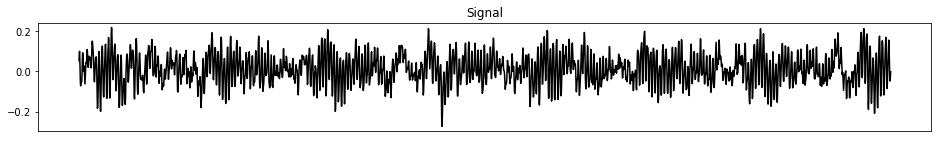

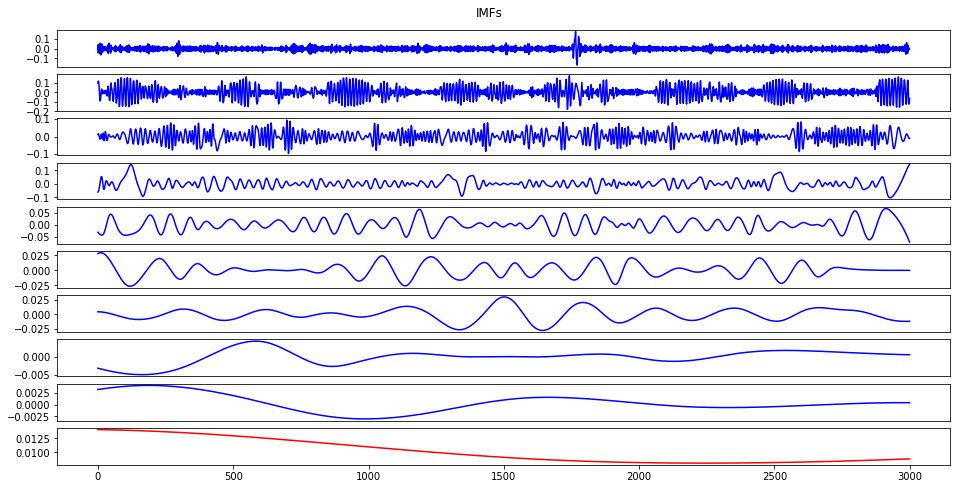

In [7]:
HHT.plot_imfs(normal_ex, imfs)

In [8]:
hht_image = HHT.sig2hht(normal_ex, max_imf = None, freqsol = 100, timesol = 100)

Signal / shape: (3000,)
IMFs / shape: (10, 3000)
Instantaneous frequency / shape: (3000, 9), max: 5996.9322237023525, min: 0.0045946421083571925
Instantaneous amplitude / shape: (3001, 9), max: 0.21195783490888007, min: 0.00018359090779757552
Hilbert huang transform / shape: (100, 100)


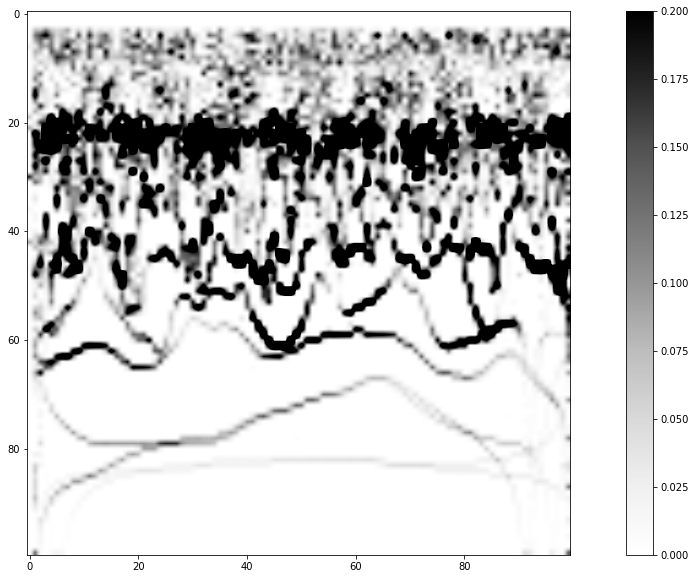

In [9]:
plt.figure(figsize=(20,10))
plt.imshow(hht_image, cmap='Greys',
           clim=[0,0.2], interpolation='bilinear')
plt.colorbar()
plt.show()

In [10]:
hht_images = HHT.sig2hht(normal_ex, max_imf = None, freqsol = 50, timesol = 50, mode = 'channel_wise')

Signal / shape: (3000,)
IMFs / shape: (9, 3000)
Instantaneous frequency / shape: (3000, 8), max: 5988.648188647636, min: 0.004397726741171439
Instantaneous amplitude / shape: (3001, 8), max: 0.2327826925195998, min: 0.00045233005555253894
Hilbert huang transform / shape: (8, 50, 50)


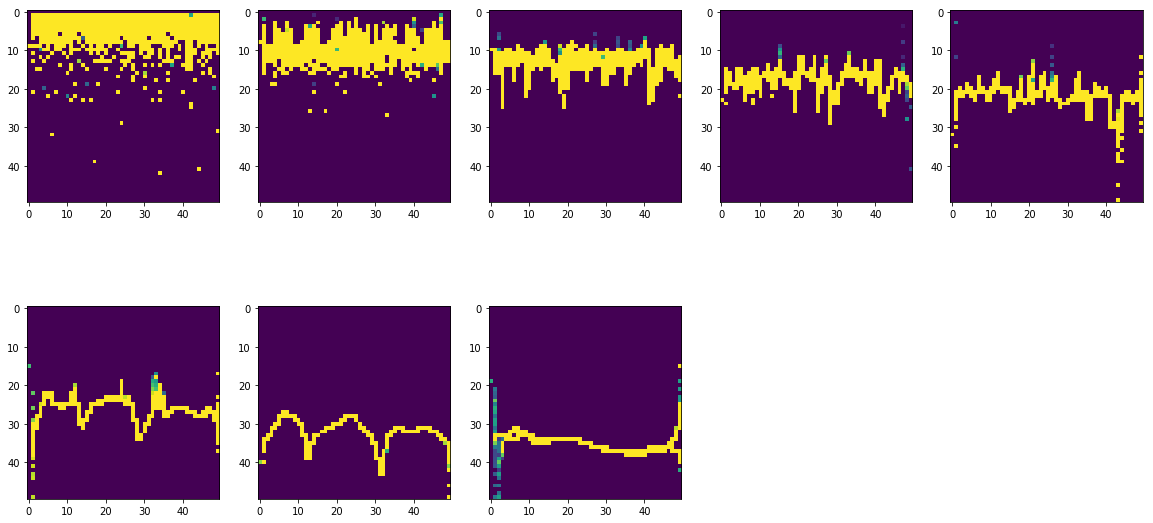

In [11]:
plt.figure(figsize=(20,10))
for i in range(hht_images.shape[0]):
    plt.subplot(2,5,i+1); plt.imshow(hht_images[i,:,:], clim=[0,0.01])
plt.show()

# drive ball

In [43]:
d_ball

['dball_14.npy', 'dball_21.npy', 'dball_28.npy', 'dball_7.npy']

In [12]:
dball = np.load('/mnt/disk1/sooyoung/AnoRNN/data/BDC_savednpy/' + d_ball[0])

print("drive ball shape:", dball.shape)
print("drive ball 1st:", dball[0].shape)
print("drive ball 2nd:", dball[1].shape)
print("drive ball 3rd:", dball[2].shape)
print("drive ball 4th:", dball[3].shape)

drive ball shape: (4,)
drive ball 1st: (121846,)
drive ball 2nd: (122136,)
drive ball 3rd: (121991,)
drive ball 4th: (122136,)


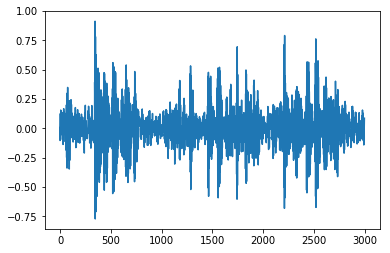

In [13]:
dball_ex = dball[1][:interval]
plt.plot(dball_ex)
plt.show()

Signal / shape: (3000,)
IMFs / shape: (10, 3000)
Instantaneous frequency / shape: (3000, 9), max: 5997.007343237907, min: 0.004520000615307486
Instantaneous amplitude / shape: (3001, 9), max: 1.0161791025239781, min: 7.10456743728623e-05
Hilbert huang transform / shape: (100, 100)


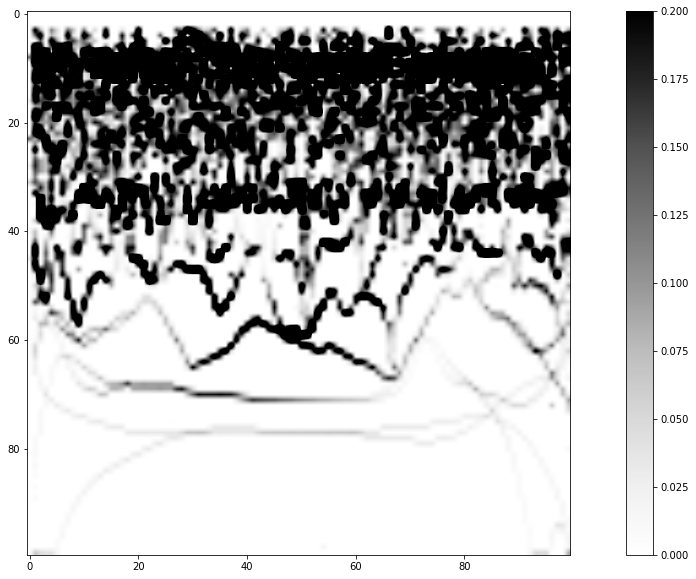

In [14]:
hht_image = HHT.sig2hht(dball_ex, max_imf = None, freqsol = 100, timesol = 100)

plt.figure(figsize=(20,10))
plt.imshow(hht_image, cmap='Greys',
           clim=[0,0.2], interpolation='bilinear')
plt.colorbar()
plt.show()

Signal / shape: (3000,)
IMFs / shape: (10, 3000)
Instantaneous frequency / shape: (3000, 9), max: 5997.870047778895, min: 0.01484352044485511
Instantaneous amplitude / shape: (3001, 9), max: 1.02402951305285, min: 0.00011089009421812271
Hilbert huang transform / shape: (9, 50, 50)


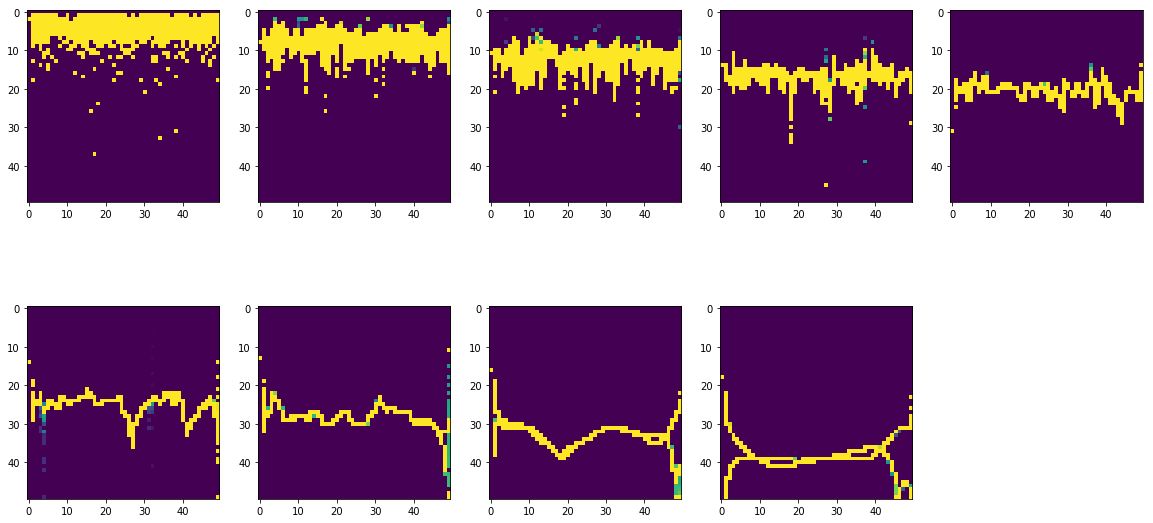

In [15]:
hht_images = HHT.sig2hht(dball_ex, max_imf = None, freqsol = 50, timesol = 50, mode = 'channel_wise')

plt.figure(figsize=(20,10))
for i in range(hht_images.shape[0]):
    plt.subplot(2,5,i+1); plt.imshow(hht_images[i,:,:], clim=[0,0.01])
plt.show()

# drive inner

In [42]:
d_inner

['dinner_14.npy', 'dinner_21.npy', 'dinner_28.npy', 'dinner_7.npy']

In [16]:
dinner = np.load('/mnt/disk1/sooyoung/AnoRNN/data/BDC_savednpy/' + d_inner[0])

print("drive inner shape:", dinner.shape)
print("drive inner 1st:", dinner[0].shape)
print("drive inner 2nd:", dinner[1].shape)
print("drive inner 3rd:", dinner[2].shape)
print("drive inner 4th:", dinner[3].shape)

drive inner shape: (4,)
drive inner 1st: (121846,)
drive inner 2nd: (121846,)
drive inner 3rd: (121846,)
drive inner 4th: (121701,)


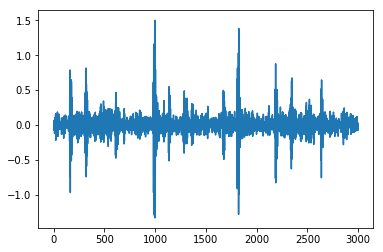

In [17]:
dinner_ex = dinner[1][:interval]
plt.plot(dinner_ex)
plt.show()

Signal / shape: (3000,)
IMFs / shape: (10, 3000)
Instantaneous frequency / shape: (3000, 9), max: 5999.301568506497, min: 0.023928824716056767
Instantaneous amplitude / shape: (3001, 9), max: 1.670362195032049, min: 0.0005223970432091427
Hilbert huang transform / shape: (100, 100)


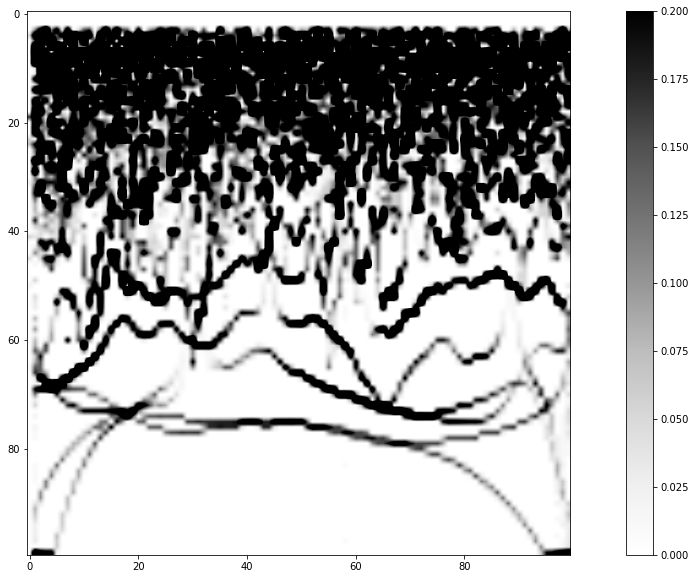

In [18]:
hht_image = HHT.sig2hht(dinner_ex, max_imf = None, freqsol = 100, timesol = 100)

plt.figure(figsize=(20,10))
plt.imshow(hht_image, cmap='Greys',
           clim=[0,0.2], interpolation='bilinear')
plt.colorbar()
plt.show()

Signal / shape: (3000,)
IMFs / shape: (10, 3000)
Instantaneous frequency / shape: (3000, 9), max: 5997.894043250762, min: 0.07261648166178071
Instantaneous amplitude / shape: (3001, 9), max: 1.595183384974755, min: 0.0003459273007950045
Hilbert huang transform / shape: (9, 50, 50)


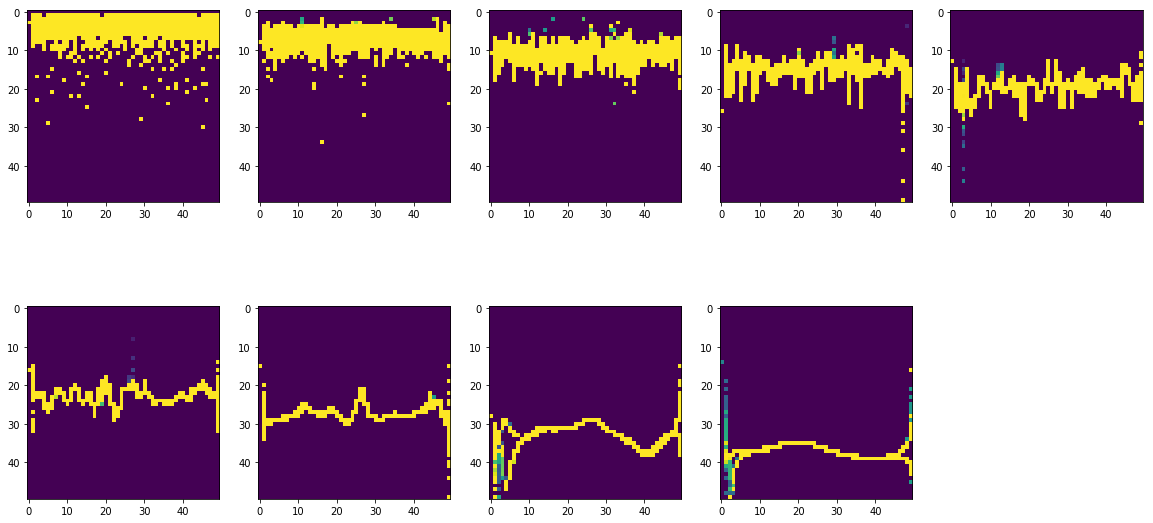

In [19]:
hht_images = HHT.sig2hht(dinner_ex, max_imf = None, freqsol = 50, timesol = 50, mode = 'channel_wise')

plt.figure(figsize=(20,10))
for i in range(hht_images.shape[0]):
    plt.subplot(2,5,i+1); plt.imshow(hht_images[i,:,:], clim=[0,0.01])
plt.show()

# drive outer

In [41]:
d_outer

['douter_14.npy', 'douter_21.npy', 'douter_7.npy']

In [20]:
douter = np.load('/mnt/disk1/sooyoung/AnoRNN/data/BDC_savednpy/' + d_outer[0])

print("drive outer shape:", douter.shape)
print("drive outer 1st:", douter[0].shape)
print("drive outer 2nd:", douter[1].shape)
print("drive outer 3rd:", douter[2].shape)
print("drive outer 4th:", douter[3].shape)

drive outer shape: (4,)
drive outer 1st: (121846,)
drive outer 2nd: (122136,)
drive outer 3rd: (121846,)
drive outer 4th: (121991,)


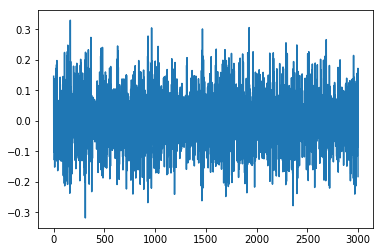

In [21]:
douter_ex = douter[1][:interval]
plt.plot(douter_ex)
plt.show()

Signal / shape: (3000,)
IMFs / shape: (10, 3000)
Instantaneous frequency / shape: (3000, 9), max: 5997.6117773287415, min: 0.009684462251831394
Instantaneous amplitude / shape: (3001, 9), max: 0.3183735719717145, min: 5.460377973171532e-05
Hilbert huang transform / shape: (100, 100)


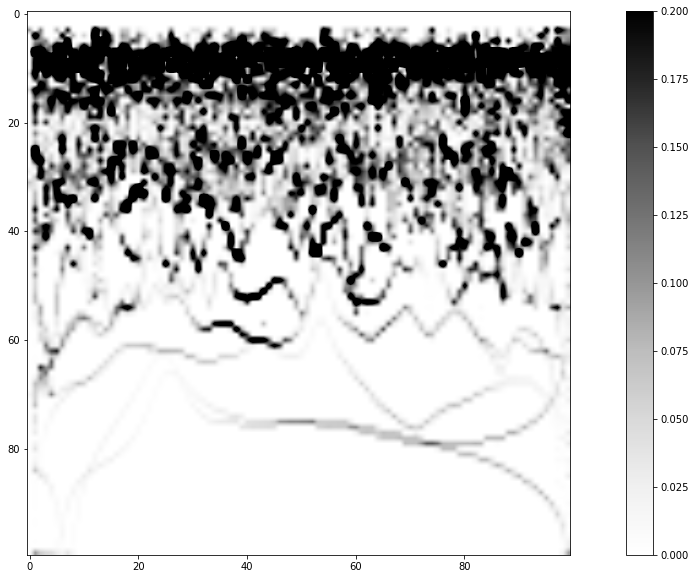

In [22]:
hht_image = HHT.sig2hht(douter_ex, max_imf = None, freqsol = 100, timesol = 100)

plt.figure(figsize=(20,10))
plt.imshow(hht_image, cmap='Greys',
           clim=[0,0.2], interpolation='bilinear')
plt.colorbar()
plt.show()

Signal / shape: (3000,)
IMFs / shape: (10, 3000)
Instantaneous frequency / shape: (3000, 9), max: 5991.7907748643265, min: 0.027007772186935102
Instantaneous amplitude / shape: (3001, 9), max: 0.35985090781930673, min: 3.56492446612272e-05
Hilbert huang transform / shape: (9, 50, 50)


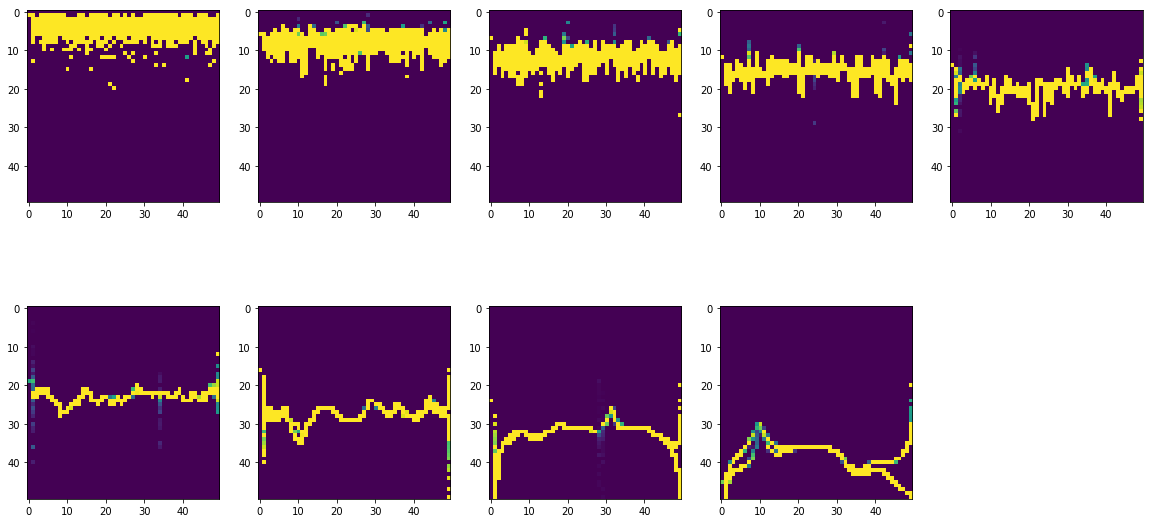

In [23]:
hht_images = HHT.sig2hht(douter_ex, max_imf = None, freqsol = 50, timesol = 50, mode = 'channel_wise')

plt.figure(figsize=(20,10))
for i in range(hht_images.shape[0]):
    plt.subplot(2,5,i+1); plt.imshow(hht_images[i,:,:], clim=[0,0.01])
plt.show()

# fan ball

In [40]:
f_ball

['fball_14.npy', 'fball_21.npy', 'fball_7.npy']

In [24]:
fball = np.load('/mnt/disk1/sooyoung/AnoRNN/data/BDC_savednpy/' + f_ball[0])

print("fan ball shape:", fball.shape)
print("fan ball 1st:", fball[0].shape)
print("fan ball 2nd:", fball[1].shape)
print("fan ball 3rd:", fball[2].shape)
print("fan ball 4th:", fball[3].shape)

fan ball shape: (4,)
fan ball 1st: (122086,)
fan ball 2nd: (121719,)
fan ball 3rd: (122269,)
fan ball 4th: (121168,)


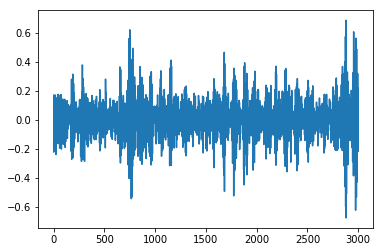

In [25]:
fball_ex = fball[1][:interval]
plt.plot(fball_ex)
plt.show()

Signal / shape: (3000,)
IMFs / shape: (10, 3000)
Instantaneous frequency / shape: (3000, 9), max: 5995.618387831037, min: 0.16108310168024853
Instantaneous amplitude / shape: (3001, 9), max: 0.7283510840182482, min: 7.17938809144439e-05
Hilbert huang transform / shape: (100, 100)


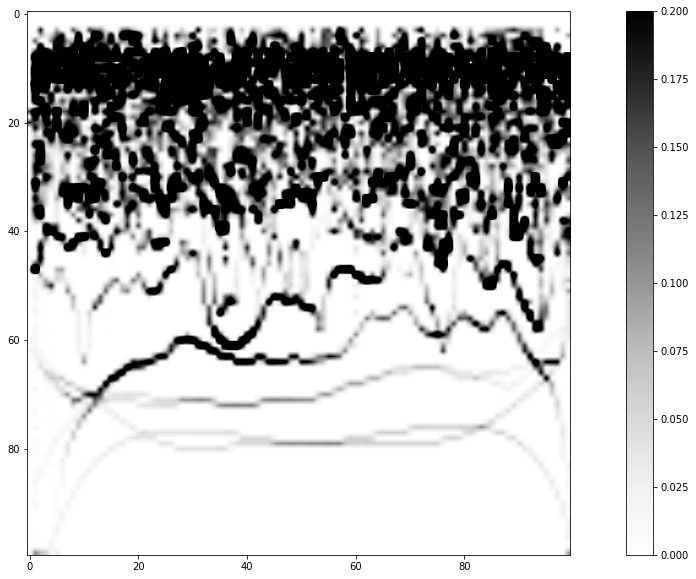

In [26]:
hht_image = HHT.sig2hht(fball_ex, max_imf = None, freqsol = 100, timesol = 100)

plt.figure(figsize=(20,10))
plt.imshow(hht_image, cmap='Greys',
           clim=[0,0.2], interpolation='bilinear')
plt.colorbar()
plt.show()

Signal / shape: (3000,)
IMFs / shape: (9, 3000)
Instantaneous frequency / shape: (3000, 8), max: 5996.937651683124, min: 0.04121022518396523
Instantaneous amplitude / shape: (3001, 8), max: 0.7682555595843151, min: 0.0002362909345276578
Hilbert huang transform / shape: (8, 50, 50)


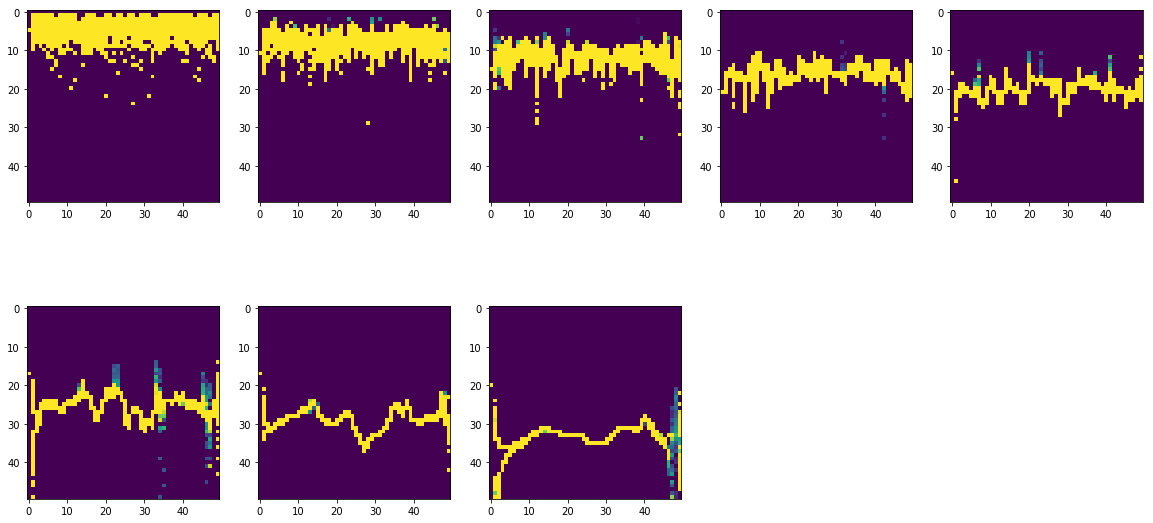

In [27]:
hht_images = HHT.sig2hht(fball_ex, max_imf = None, freqsol = 50, timesol = 50, mode = 'channel_wise')

plt.figure(figsize=(20,10))
for i in range(hht_images.shape[0]):
    plt.subplot(2,5,i+1); plt.imshow(hht_images[i,:,:], clim=[0,0.01])
plt.show()

# fan inner

In [39]:
f_inner

['finner_14.npy', 'finner_21.npy', 'finner_7.npy']

In [28]:
finner = np.load('/mnt/disk1/sooyoung/AnoRNN/data/BDC_savednpy/' + f_inner[0])

print("fan inner shape:", finner.shape)
print("fan inner 1st:", finner[0].shape)
print("fan inner 2nd:", finner[1].shape)
print("fan inner 3rd:", finner[2].shape)
print("fan inner 4th:", finner[3].shape)

fan inner shape: (4,)
fan inner 1st: (121351,)
fan inner 2nd: (121351,)
fan inner 3rd: (121351,)
fan inner 4th: (121168,)


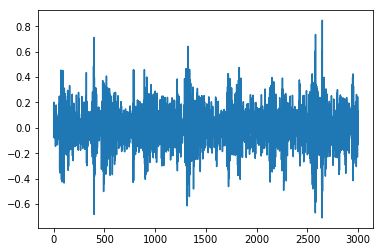

In [29]:
finner_ex = finner[1][:interval]
plt.plot(finner_ex)
plt.show()

Signal / shape: (3000,)
IMFs / shape: (11, 3000)
Instantaneous frequency / shape: (3000, 10), max: 5993.335966820126, min: 0.009263979162590141
Instantaneous amplitude / shape: (3001, 10), max: 0.8031901478941127, min: 0.00016878841389516997
Hilbert huang transform / shape: (100, 100)


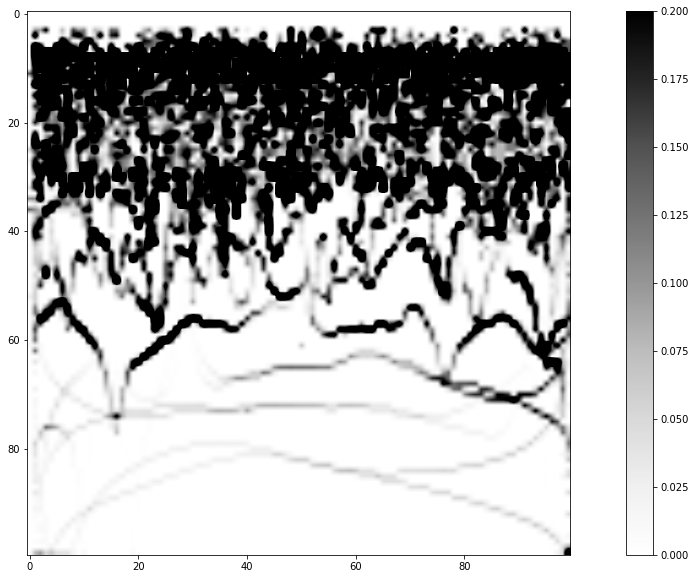

In [30]:
hht_image = HHT.sig2hht(finner_ex, max_imf = None, freqsol = 100, timesol = 100)

plt.figure(figsize=(20,10))
plt.imshow(hht_image, cmap='Greys',
           clim=[0,0.2], interpolation='bilinear')
plt.colorbar()
plt.show()

Signal / shape: (3000,)
IMFs / shape: (10, 3000)
Instantaneous frequency / shape: (3000, 9), max: 5992.532515480541, min: 0.007693895350123537
Instantaneous amplitude / shape: (3001, 9), max: 0.8286414699373719, min: 6.118166930690979e-05
Hilbert huang transform / shape: (9, 50, 50)


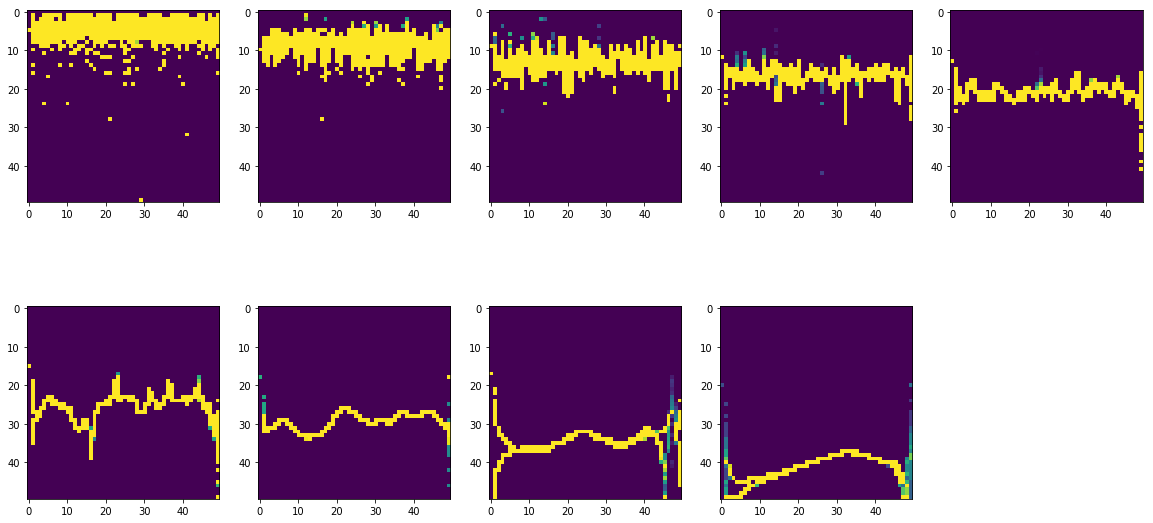

In [31]:
hht_images = HHT.sig2hht(finner_ex, max_imf = None, freqsol = 50, timesol = 50, mode = 'channel_wise')

plt.figure(figsize=(20,10))
for i in range(hht_images.shape[0]):
    plt.subplot(2,5,i+1); plt.imshow(hht_images[i,:,:], clim=[0,0.01])
plt.show()

# fan outer

In [38]:
f_outer

['fouter_14.npy', 'fouter_21.npy', 'fouter_7.npy']

In [33]:
fouter = np.load('/mnt/disk1/sooyoung/AnoRNN/data/BDC_savednpy/' + f_outer[0])

print("fouter shape:", fouter.shape)
print("fouter 1st:", fouter[0].shape)
# print("fouter 2nd:", fouter[1].shape)
# print("fouter 3rd:", fouter[2].shape)
# print("fouter 4th:", fouter[3].shape)

fouter shape: (1, 120984)
fouter 1st: (120984,)


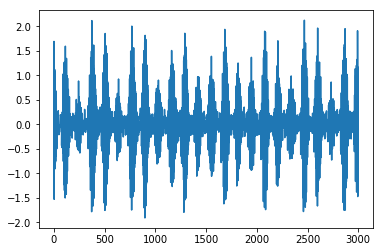

In [35]:
fouter_ex = fouter[0][:interval]
plt.plot(fouter_ex)
plt.show()

Signal / shape: (3000,)
IMFs / shape: (9, 3000)
Instantaneous frequency / shape: (3000, 8), max: 5997.767788978046, min: 0.03816646014598274
Instantaneous amplitude / shape: (3001, 8), max: 2.35362748616764, min: 0.001316012864960352
Hilbert huang transform / shape: (100, 100)


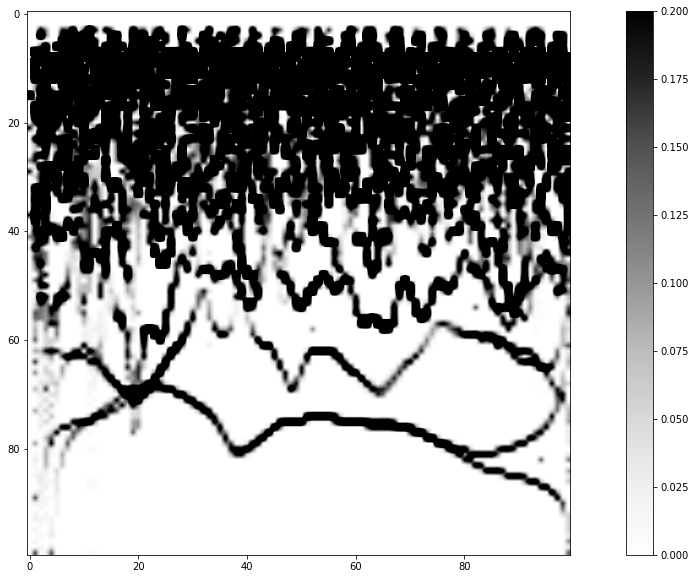

In [36]:
hht_image = HHT.sig2hht(fouter_ex, max_imf = None, freqsol = 100, timesol = 100)

plt.figure(figsize=(20,10))
plt.imshow(hht_image, cmap='Greys',
           clim=[0,0.2], interpolation='bilinear')
plt.colorbar()
plt.show()

Signal / shape: (3000,)
IMFs / shape: (10, 3000)
Instantaneous frequency / shape: (3000, 9), max: 5997.002634495903, min: 0.01106666670024653
Instantaneous amplitude / shape: (3001, 9), max: 2.2959728960112713, min: 0.00044523245083127465
Hilbert huang transform / shape: (9, 50, 50)


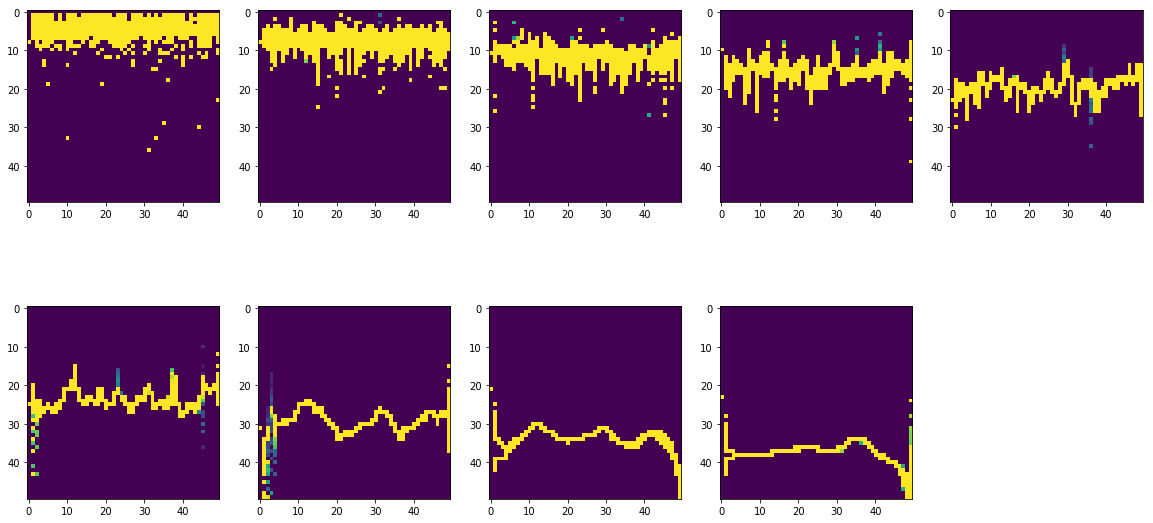

In [37]:
hht_images = HHT.sig2hht(fouter_ex, max_imf = None, freqsol = 50, timesol = 50, mode = 'channel_wise')

plt.figure(figsize=(20,10))
for i in range(hht_images.shape[0]):
    plt.subplot(2,5,i+1); plt.imshow(hht_images[i,:,:], clim=[0,0.01])
plt.show()